In [3]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [122]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1]) + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [237]:
def prob2(y0, t_steps):
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    alpha, beta, gamma, delta = 1/1000, 1/1000, 1, 1
    cx, cy = 0.5, 0.5
    r = 0.1
    start_x, start_y, start_vx, start_vy, start_theta = 0.1, 0.5, 0, 0, 0
    end_x, end_y, end_vx, end_vy, end_theta = 0.9, 0.5, 0, 0, 0
    lambda_1, lambda_2 = 1, 1
    def ode(t, y):
        #y0=s1, y1=s2, y2=s3, y3=s4, y4=s5, y5=p1, y6=p2, y7=p3, y8=p4, y9=p5
        u0 = -(y[7]*np.cos(y[4])+y[8]*np.sin(y[4]))/(2*gamma)
        u1 = -y[9]/(2*delta)
        denom = (y[0]-cx)**2+(y[1]-cy)**2-r**2
        p1 = beta * lambda_1 * (1/y[0]**(lambda_1+1)-1/(1-y[0])**(lambda_1+1)) - 2 * lambda_2 * alpha * (y[0]-cx) / denom**(lambda_2+1)
        p2 = beta * lambda_1 * (1/y[1]**(lambda_1+1)-1/(1-y[1])**(lambda_1+1)) - 2 * lambda_2 * alpha * (y[1]-cy) / denom**(lambda_2+1)
        return [y[2], y[3], u0*np.cos(y[4]), u0*np.sin(y[4]), u1, 
                p1, p2, -y[5], -y[6], u0*(y[7]*np.sin(y[4])-y[8]*np.sin(y[4]))]
    bc = lambda ya, yb: [ya[0]-start_x, ya[1]-start_y, ya[2]-start_vx, ya[3]-start_vy, ya[4]-start_theta,
                         yb[0]-end_x, yb[1]-end_y, yb[2]-end_vx, yb[3]-end_vy, yb[4]-end_theta]
    t = np.linspace(0,0.3,t_steps)
#     y0[0] = 0.1
#     y0[1] = 0.5
#     y0[2] = 0
#     y0[3] = 0
#     y0[4] = 0
    sol = solve_bvp(ode, bc, t, y0, max_nodes=30000)
    plt.plot(sol.y[0], sol.y[1], 'r', label="optimal path")
    # Plot obstacle
#     obstacle = plt.Circle((0.5,0.5), 0.1)
    plt.gca().add_patch(plt.Circle((0.5,0.5), 0.1))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    # Limit to (1,1) grid
    plt.plot(sol.y[0], sol.y[1], 'r', label="optimal path")
    plt.gca().add_patch(plt.Circle((0.5,0.5), 0.1))
    plt.legend()
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(start_x, start_y, 'kx')
    plt.plot(end_x, end_y, 'kx')
    plt.show()
    return sol

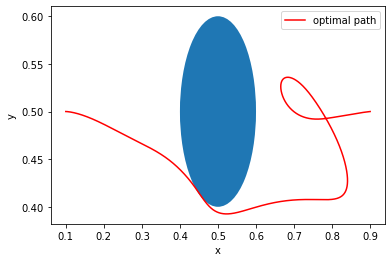

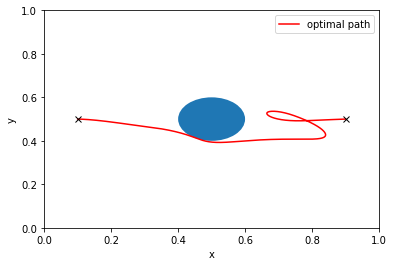

In [238]:
sol = prob2(y0, t_steps)

In [223]:
t_steps = 1001
y0 = np.random.rand(10,t_steps)

In [239]:
print(y0)

[[0.24371592 0.13203066 0.28899833 ... 0.40189706 0.17724609 0.3137443 ]
 [0.59055631 0.25101709 0.94530029 ... 0.47156918 0.36582214 0.02919715]
 [0.60780296 0.99596494 0.21085841 ... 0.35766273 0.61383573 0.26000357]
 ...
 [0.16339437 0.69093311 0.04778429 ... 0.98558785 0.18985397 0.99535502]
 [0.51267608 0.60980582 0.00495338 ... 0.34257468 0.1177653  0.42098329]
 [0.85132247 0.69970814 0.80481125 ... 0.420107   0.1603765  0.47636466]]
